In [1]:
import kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

In [2]:
import pandas as pd

df = pd.read_csv(f'{path}/creditcard.csv')

print('First 5 rows of the DataFrame: ')
print(df.head())

print('\nData types of each column: ')
df.info()

print('\nDescriptive statistics of the DataFrame: ')
print(df.describe())

First 5 rows of the DataFrame: 
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   



Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Percentage of Legitimate Transactions (Class 0): 99.8273%
Percentage of Fraudulent Transactions (Class 1): 0.1727%


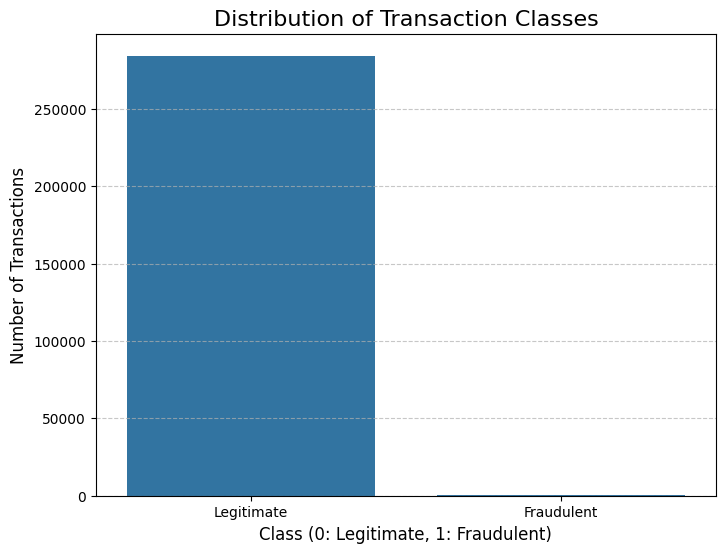

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

class_distribution = df['Class'].value_counts()
print('Class Distribution:\n', class_distribution)

total_transactions = df['Class'].count()
fraud_percentage = (class_distribution[1] / total_transactions) * 100
legit_percentage = (class_distribution[0] / total_transactions) * 100

print(f'\nPercentage of Legitimate Transactions (Class 0): {legit_percentage:.4f}%')
print(f'Percentage of Fraudulent Transactions (Class 1): {fraud_percentage:.4f}%')

plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Transaction Classes', fontsize=16)
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Fraudulent'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [4]:
df['Time_Hour'] = df['Time'].apply(lambda x: x / 3600 % 24)
print("Added 'Time_Hour' column to the DataFrame")

Added 'Time_Hour' column to the DataFrame


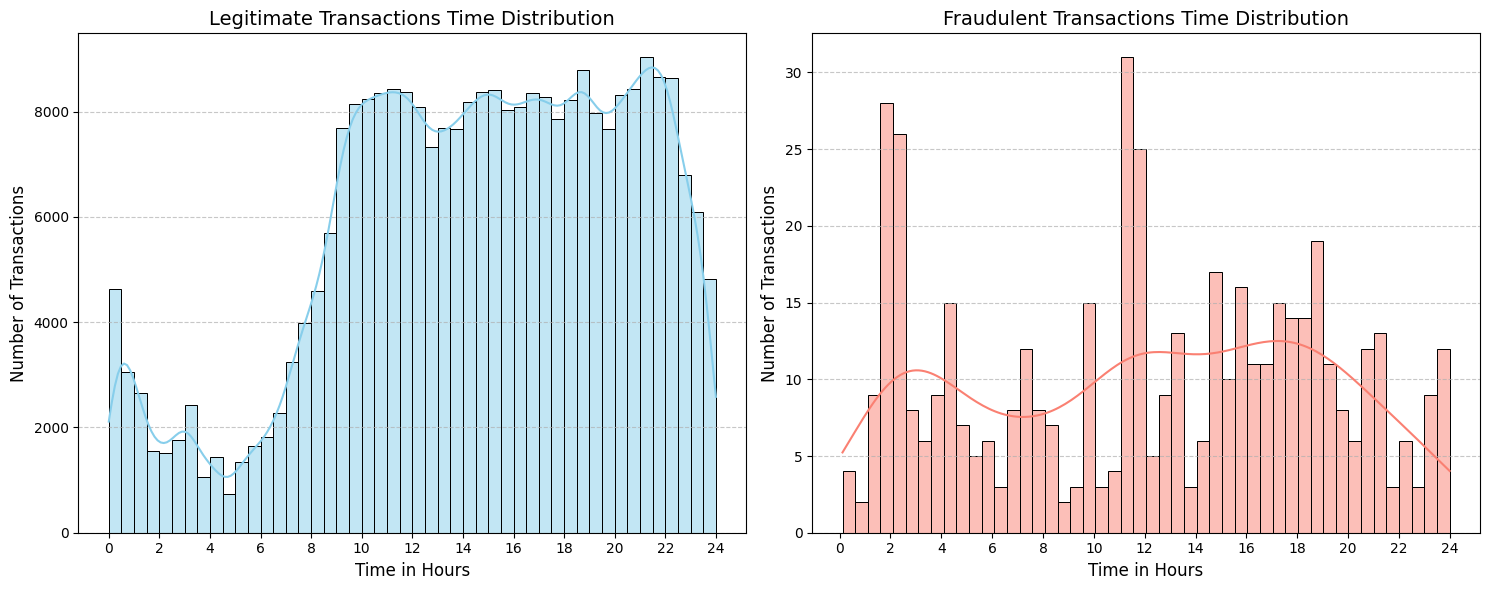

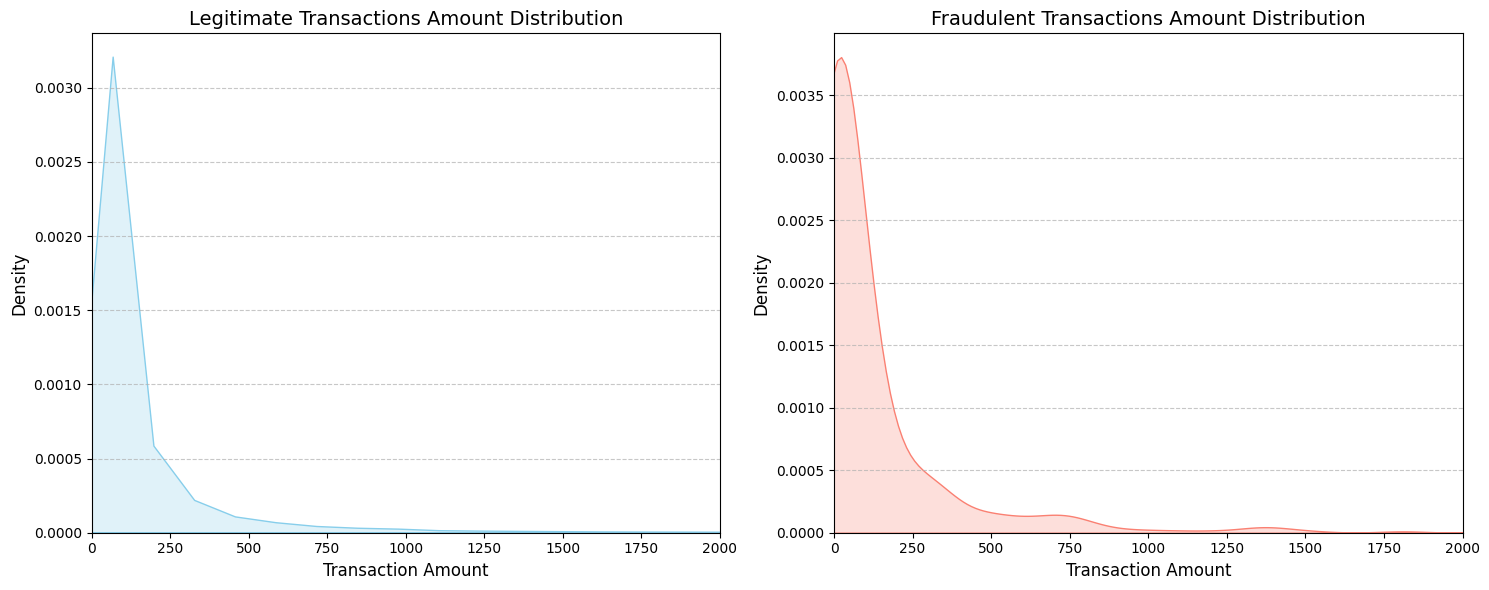

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

legit_transactions = df[df['Class'] == 0]
fraud_transactions = df[df['Class'] == 1]

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(legit_transactions['Time_Hour'], bins=48, kde=True, color='skyblue')
plt.title('Legitimate Transactions Time Distribution', fontsize=14)
plt.xlabel('Time in Hours', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(range(0, 25, 2))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2) 
sns.histplot(fraud_transactions['Time_Hour'], bins=48, kde=True, color='salmon')
plt.title('Fraudulent Transactions Time Distribution', fontsize=14)
plt.xlabel('Time in Hours', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(range(0, 25, 2))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(legit_transactions['Amount'], color='skyblue', fill=True)
plt.title('Legitimate Transactions Amount Distribution', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(0, 2000)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
sns.kdeplot(fraud_transactions['Amount'], color='salmon', fill=True)
plt.title('Fraudulent Transactions Amount Distribution', fontsize=14)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(0, 2000)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

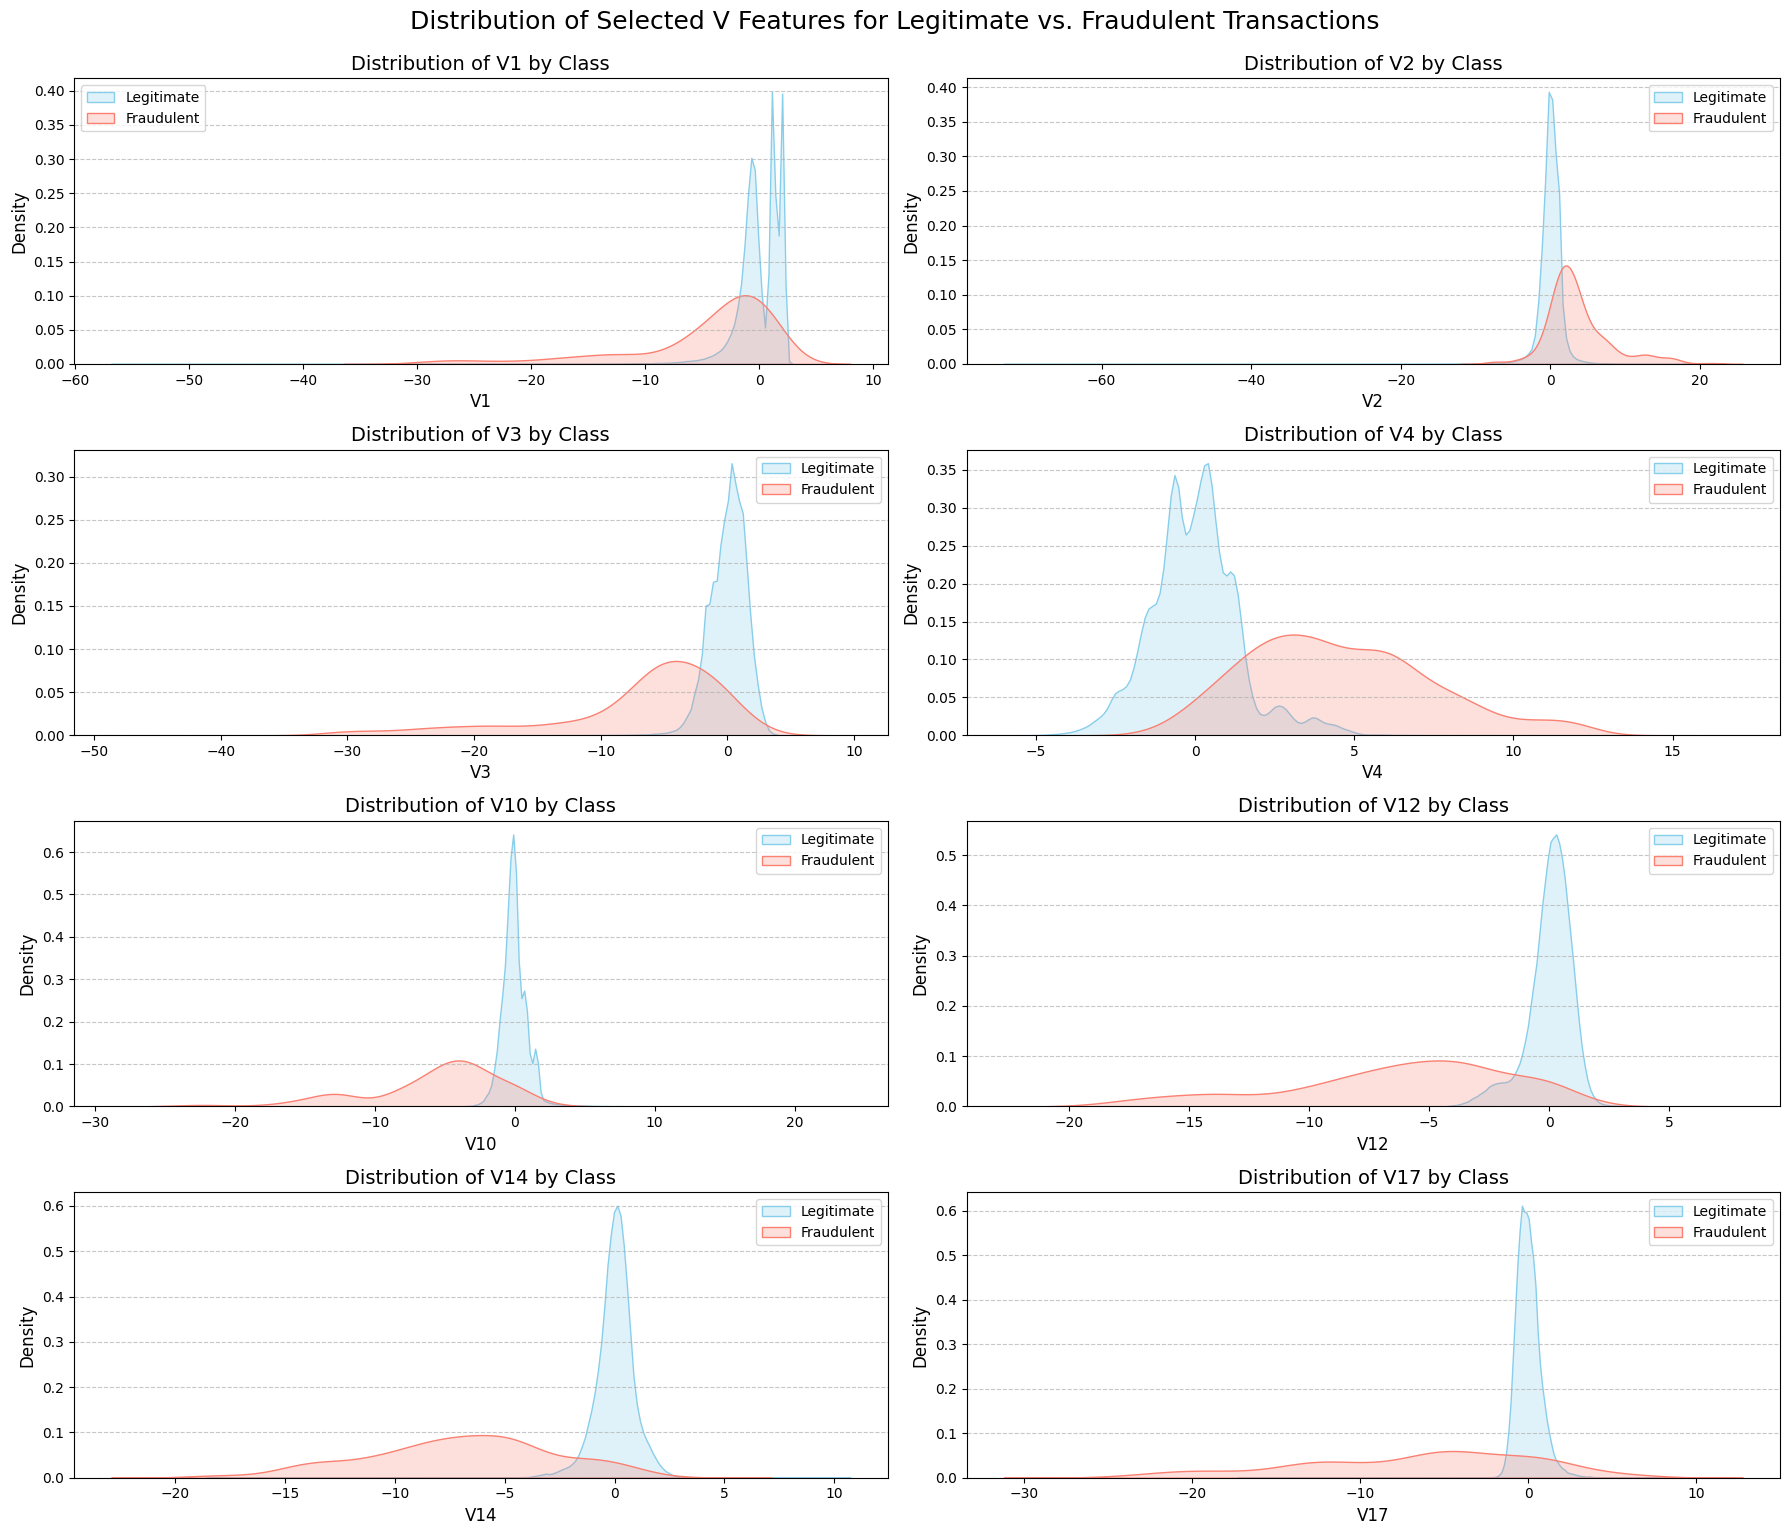

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

v_features = ['V1', 'V2', 'V3', 'V4', 'V10', 'V12', 'V14', 'V17']

plt.figure(figsize=(18, 15))

for i, feature in enumerate(v_features):
    plt.subplot(4, 2, i + 1)
    sns.kdeplot(legit_transactions[feature], label='Legitimate', color='skyblue', fill=True)
    sns.kdeplot(fraud_transactions[feature], label='Fraudulent', color='salmon', fill=True)
    plt.title(f'Distribution of {feature} by Class', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.suptitle('Distribution of Selected V Features for Legitimate vs. Fraudulent Transactions', y=1.02, fontsize=18)
plt.show()

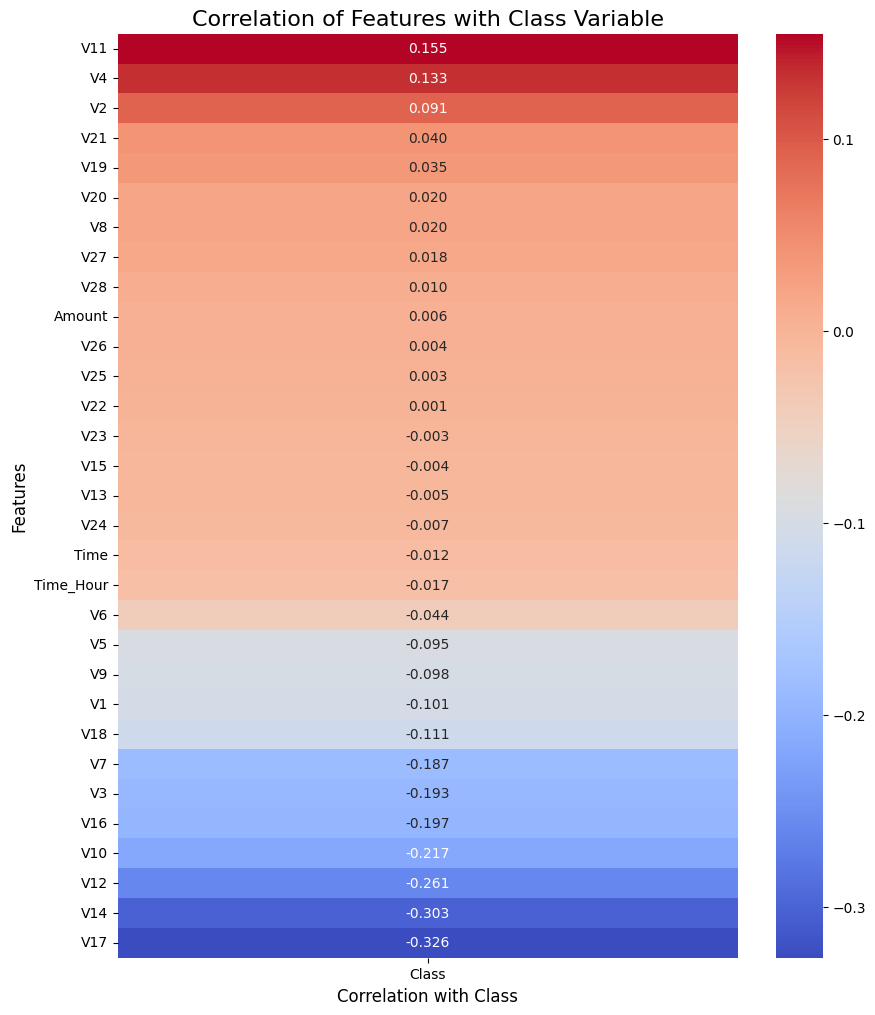

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

class_correlations = correlation_matrix['Class'].drop('Class').sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.heatmap(class_correlations.to_frame(), annot=True, cmap='coolwarm', fmt=".3f", cbar=True)
plt.title('Correlation of Features with Class Variable', fontsize=16)
plt.xlabel('Correlation with Class', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.yticks(rotation=0)
plt.show()

In [8]:
print('--- Missing Values Check ---')
missing_values = df.isnull().sum()
print('Number of missing values per column:\n', missing_values[missing_values > 0])

print('\n--- Duplicate Rows Check ---')
duplicate_rows = df.duplicated().sum()
print(f'Total number of duplicate rows: {duplicate_rows}')

--- Missing Values Check ---
Number of missing values per column:
 Series([], dtype: int64)

--- Duplicate Rows Check ---
Total number of duplicate rows: 1081


In [9]:
df_cleaned = df.drop_duplicates()

print(f'Original DataFrame shape: {df.shape}')
print(f'DataFrame shape after removing duplicates: {df_cleaned.shape}')

df = df_cleaned.copy()
print('\nDuplicates removed. The DataFrame `df` has been updated.')

Original DataFrame shape: (284807, 32)
DataFrame shape after removing duplicates: (283726, 32)

Duplicates removed. The DataFrame `df` has been updated.


In [10]:
print('First 5 rows of the processed DataFrame:')
print(df.head())

First 5 rows of the processed DataFrame:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.50

In [11]:
print('\nShape of the processed DataFrame:')
print(df.shape)


Shape of the processed DataFrame:
(283726, 32)


In [12]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv(f'{path}/creditcard.csv')

# Display the first 5 rows of the DataFrame
print('First 5 rows of the DataFrame:')
print(df.head())

# Print the data types of each column
print('\nData types of each column:')
df.info()

# Generate descriptive statistics of the DataFrame
print('\nDescriptive statistics of the DataFrame:')
print(df.describe())

First 5 rows of the DataFrame:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

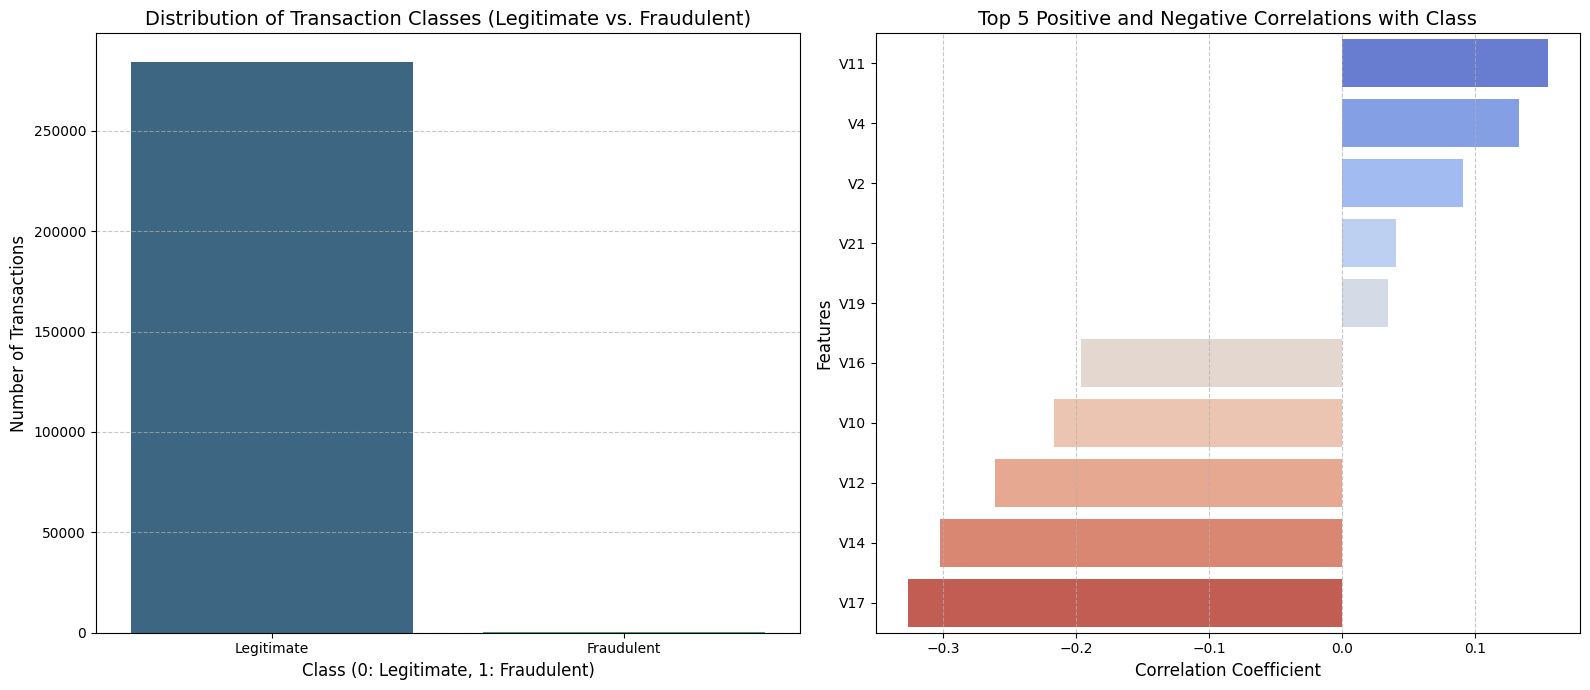

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a figure with two subplots
plt.figure(figsize=(16, 7))

# 2. First subplot: Count plot for Class distribution
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.countplot(x='Class', data=df, hue='Class', palette='viridis', legend=False)
plt.title('Distribution of Transaction Classes (Legitimate vs. Fraudulent)', fontsize=14)
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Legitimate', 'Fraudulent'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 3. Second subplot: Bar plot for most correlated features with 'Class'
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot

# Get top 5 positive and top 5 negative correlations
top_5_positive = class_correlations.head(5)
top_5_negative = class_correlations.tail(5)

# Concatenate for plotting
combined_correlations = pd.concat([top_5_positive, top_5_negative])

sns.barplot(x=combined_correlations.values, y=combined_correlations.index, hue=combined_correlations.index, palette='coolwarm', legend=False)
plt.title('Top 5 Positive and Negative Correlations with Class', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# 4. Adjust layout and display plot
plt.tight_layout()
plt.show()